### GNCIPL Week 2 Project 2
### Health Insurance Cost Prediction
### Submitted By: Sahil Adlakha

Domain: Medical Research

Dataset: Insurance.csv (from Kaggle)

Key Focus Area: Effects of Different Features, EDA Analysis of Data, Model Building, Cost Prediction

In [34]:
#Importing Libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy as sp
from warnings import filterwarnings
filterwarnings('ignore')

df = pd.read_csv("insurance.csv")

print(df.head(10))
print(df.describe())
print(df.shape)

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520
5   31  female  25.740         0     no  southeast   3756.62160
6   46  female  33.440         1     no  southeast   8240.58960
7   37  female  27.740         3     no  northwest   7281.50560
8   37    male  29.830         2     no  northeast   6406.41070
9   60  female  25.840         0     no  northwest  28923.13692
               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
2

In [35]:
#Checking Missing Values
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

<AxesSubplot:>

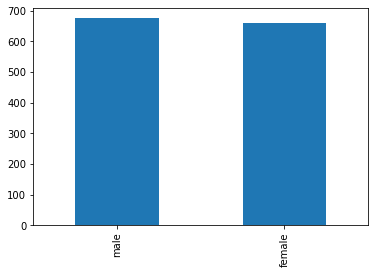

In [36]:
df['sex'].value_counts().plot(kind='bar')


<AxesSubplot:>

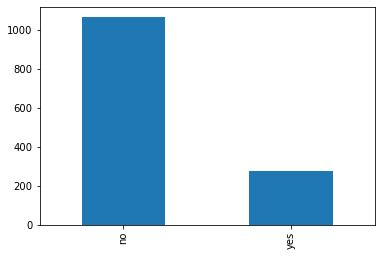

In [37]:
df['smoker'].value_counts().plot(kind='bar')

<AxesSubplot:>

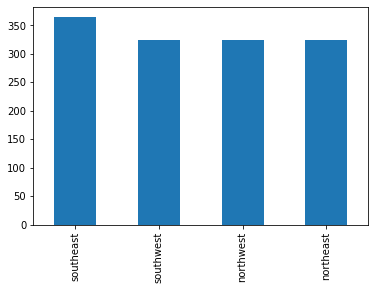

In [38]:
df['region'].value_counts().plot(kind='bar')

<AxesSubplot:xlabel='age'>

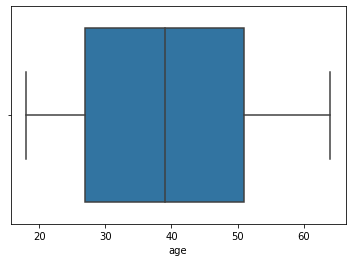

In [39]:
sns.boxplot(df["age"])


<AxesSubplot:xlabel='bmi'>

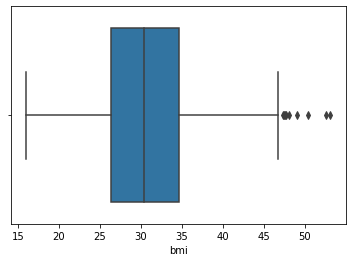

In [40]:
sns.boxplot(df["bmi"])


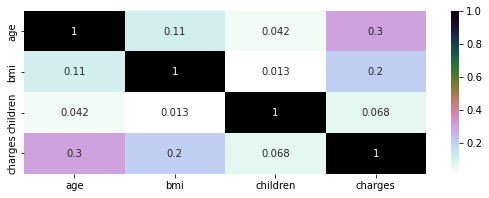

In [41]:
# Correlation Heatmap
plt.figure(figsize=(9,3)) 
sns.heatmap(df.corr(),annot=True,cmap='cubehelix_r') 
plt.show()


In [42]:
# Converting to Numerical Values
df['sex']=df['sex'].map({'female':0,'male':1})
df['smoker']=df['smoker'].map({'yes':1,'no':0})
df['region']=df['region'].map({'southwest':1,'southeast':2,
                   'northwest':3,'northeast':4})
df

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,1,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,3,21984.47061
4,32,1,28.880,0,0,3,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,3,10600.54830
1334,18,0,31.920,0,0,4,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,1,2007.94500


age :  0.29900819333064765
sex :  0.057292062202025346
bmi :  0.1983409688336289
children :  0.06799822684790481
smoker :  0.7872514304984775
region :  0.006208234909444465
charges :  1.0


Text(0, 0.5, 'Absolute correlation')

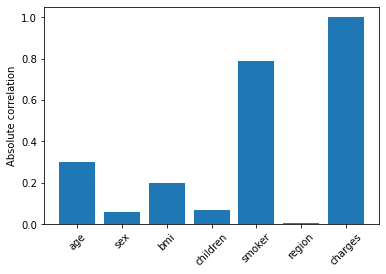

In [43]:
#Find absolute correlation to decide which columns should be dropped
corr_vals=[]
collabel=[]
for col in [i for i in df.columns]:
    
    p_val=sp.stats.pearsonr(df[col],df["charges"])
    corr_vals.append(np.abs(p_val[0]))
    print(col,": ",np.abs(p_val[0]))
    collabel.append(col)
plt.bar(range(1,len(corr_vals)+1),corr_vals)
plt.xticks(range(1,len(corr_vals)+1),collabel,rotation=45)
plt.ylabel("Absolute correlation")

In [44]:
# Now Dropping Columns which are not affecting the final result
df.drop(df[['sex', 'children', 'region']], axis=1, inplace=True)
df

,age,bmi,smoker,charges
0,19,27.900,1,16884.92400
1,18,33.770,0,1725.55230
2,28,33.000,0,4449.46200
3,33,22.705,0,21984.47061
4,32,28.880,0,3866.85520
...,...,...,...,...
1333,50,30.970,0,10600.54830
1334,18,31.920,0,2205.98080
1335,18,36.850,0,1629.83350
1336,21,25.800,0,2007.94500


In [45]:
X=df.drop(['charges'],axis=1)
Y=df[['charges']]
from sklearn.linear_model import LinearRegression,Lasso
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,random_state=42)


In [46]:
# Linear Regression
lrmodel=LinearRegression()
lrmodel.fit(xtrain,ytrain)
print('Train Accuracy:',lrmodel.score(xtrain,ytrain))
print('Test Accuracy:',lrmodel.score(xtest,ytest))
print('CV Score:',cross_val_score(lrmodel,X,Y,cv=5,).mean())

Train Accuracy: 0.7392286795956207
Test Accuracy: 0.7776932310583375
CV Score: 0.7450303364713811


In [47]:
# Support Vector Regression
from sklearn.metrics import r2_score
svrmodel=SVR()
svrmodel.fit(xtrain,ytrain)
ypredtrain1=svrmodel.predict(xtrain)
ypredtest1=svrmodel.predict(xtest)
print('Train Accuracy',r2_score(ytrain,ypredtrain1))
print('Test Accuracy',r2_score(ytest,ypredtest1))
print('CV Score',cross_val_score(svrmodel,X,Y,cv=5,).mean())

Train Accuracy -0.0976090172203119
Test Accuracy -0.07186276736584163
CV Score -0.1033816247689682


In [48]:
# Random Forest Regression
rfmodel=RandomForestRegressor(random_state=42,n_estimators=120)
rfmodel.fit(xtrain,ytrain)
ypredtrain2=rfmodel.predict(xtrain)
ypredtest2=rfmodel.predict(xtest)
print('Train Accuracy',r2_score(ytrain,ypredtrain2))
print('Test Accuracy',r2_score(ytest,ypredtest2))
print('CV Score',cross_val_score(rfmodel,X,Y,cv=5,).mean())

Train Accuracy 0.9680660556319072
Test Accuracy 0.8350226316690773
CV Score 0.8087125507937643


In [49]:
# XGBoost
xgmodel=XGBRegressor(n_estimators=15,max_depth=3,gamma=0)
xgmodel.fit(xtrain,ytrain)
ypredtrain4=xgmodel.predict(xtrain)
ypredtest4=xgmodel.predict(xtest)
print('Train Accuracy',r2_score(ytrain,ypredtrain4))
print('Test Accuracy',r2_score(ytest,ypredtest4))
print('CV Score',cross_val_score(xgmodel,X,Y,cv=5,).mean())

Train Accuracy 0.8711545695454357
Test Accuracy 0.8773693681066062
CV Score 0.8563840193432185


In [50]:
#XGBoost is best in case of Test Accuracy and CV Score. So we choose XGBoost.
data = {'age' : 40,
        'sex' : 1,
        'bmi' : 40.30,
        'children' : 4,
        'smoker' : 1,
        'region' : 2}

# Making prediction for new customer
new_df=pd.DataFrame(data, index=[0])
new_df=new_df.drop(new_df[['sex','region','children']],axis=1)
xgmodel.fit(X,Y)
print('Health Insurance Cost for New Customer:',xgmodel.predict(new_df)[0])


Health Insurance Cost for New Customer: 42175.49
